In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel(('Dataset2.xlsx'),sheet_name="Quarterly")
display(df)

,Year,Quarter,Public Sector Debt,Exchange Rate (IDR),Inflation (%),GDP Growth (%)
0,2000.0,Q2,NaN,NaN,NaN,-0.57492
1,NaN,Q3,NaN,NaN,NaN,2.43641
2,NaN,Q4,NaN,NaN,NaN,2.87561
3,2001.0,Q1,NaN,9895.000000,NaN,-0.71260
4,NaN,Q2,NaN,11391.000000,NaN,1.02290
...,...,...,...,...,...,...
89,NaN,Q3,3.449478e+11,15026.666667,5.193333,0.82084
90,NaN,Q4,3.479779e+11,15670.000000,5.546667,2.30518
91,2023.0,Q1,3.771135e+11,15105.000000,5.240000,0.82032
92,NaN,Q2,3.272508e+11,14915.333333,3.950000,0.84552


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 24 non-null     float64
 1   Quarter              94 non-null     object 
 2   Public Sector Debt   54 non-null     float64
 3   Exchange Rate (IDR)  90 non-null     float64
 4   Inflation (%)        83 non-null     float64
 5   GDP Growth (%)       93 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.5+ KB


In [4]:
df = df.drop(["Year","Quarter"],axis=1)

In [5]:
df = df.dropna().reset_index(drop = True)
df

,Public Sector Debt,Exchange Rate (IDR),Inflation (%),GDP Growth (%)
0,9.329492e+10,9271.666667,3.653333,1.63665
1,9.681284e+10,9091.666667,4.373333,1.67571
2,1.014496e+11,8972.333333,6.153333,1.49631
3,1.004138e+11,8977.333333,6.320000,1.60612
4,1.080922e+11,8863.000000,6.836667,1.44863
5,1.115448e+11,8569.333333,5.893333,1.45516
6,1.092319e+11,8636.333333,4.670000,1.51187
7,1.095103e+11,9024.333333,4.120000,1.46559
8,1.126658e+11,9088.333333,3.726667,1.52021
9,1.124324e+11,9411.666667,4.493333,1.48924


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Public Sector Debt,54.0,1.808944e+11,8.508692e+10,9.329492e+10,1.131944e+11,1.567928e+11,2.111473e+11,3.771135e+11
Exchange Rate (IDR),54.0,1.256983e+04,2.229936e+03,8.569333e+03,1.009783e+04,1.336933e+04,1.430450e+04,1.567000e+04
Inflation (%),54.0,4.312346e+00,1.824000e+00,1.426667e+00,3.150833e+00,4.035000e+00,5.475000e+00,8.600000e+00
GDP Growth (%),54.0,1.152187e+00,1.256861e+00,-6.894140e+00,1.171293e+00,1.259615e+00,1.436685e+00,3.276020e+00


In [7]:
scaler = StandardScaler()
df["Public Sector Debt"] = scaler.fit_transform(df["Public Sector Debt"].to_numpy().reshape(-1, 1))

In [8]:
df

,Public Sector Debt,Exchange Rate (IDR),Inflation (%),GDP Growth (%)
0,-1.039197,9271.666667,3.653333,1.63665
1,-0.997464,9091.666667,4.373333,1.67571
2,-0.942458,8972.333333,6.153333,1.49631
3,-0.954745,8977.333333,6.320000,1.60612
4,-0.863657,8863.000000,6.836667,1.44863
5,-0.822698,8569.333333,5.893333,1.45516
6,-0.850135,8636.333333,4.670000,1.51187
7,-0.846834,9024.333333,4.120000,1.46559
8,-0.809399,9088.333333,3.726667,1.52021
9,-0.812168,9411.666667,4.493333,1.48924


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Public Sector Debt,54.0,3.495147e-16,1.009390,-1.039197,-0.803129,-0.285919,0.358891,2.327756
Exchange Rate (IDR),54.0,1.256983e+04,2229.936020,8569.333333,10097.833333,13369.333333,14304.500000,15670.000000
Inflation (%),54.0,4.312346e+00,1.824000,1.426667,3.150833,4.035000,5.475000,8.600000
GDP Growth (%),54.0,1.152187e+00,1.256861,-6.894140,1.171293,1.259615,1.436685,3.276020


In [10]:
scalera = StandardScaler()
df["Exchange Rate (IDR)"] = scalera.fit_transform(df["Exchange Rate (IDR)"].to_numpy().reshape(-1, 1))
df

,Public Sector Debt,Exchange Rate (IDR),Inflation (%),GDP Growth (%)
0,-1.039197,-1.492929,3.653333,1.63665
1,-0.997464,-1.574407,4.373333,1.67571
2,-0.942458,-1.628423,6.153333,1.49631
3,-0.954745,-1.626160,6.320000,1.60612
4,-0.863657,-1.677914,6.836667,1.44863
5,-0.822698,-1.810843,5.893333,1.45516
6,-0.850135,-1.780515,4.670000,1.51187
7,-0.846834,-1.604885,4.120000,1.46559
8,-0.809399,-1.575916,3.726667,1.52021
9,-0.812168,-1.429557,4.493333,1.48924


In [11]:
## Correlation between variable
df.corr()

,Public Sector Debt,Exchange Rate (IDR),Inflation (%),GDP Growth (%)
Public Sector Debt,1.000000,0.728937,-0.536992,-0.094255
Exchange Rate (IDR),0.728937,1.000000,-0.453965,-0.194793
Inflation (%),-0.536992,-0.453965,1.000000,0.123744
GDP Growth (%),-0.094255,-0.194793,0.123744,1.000000


It can be concluded that the multicollinearity between independent variables is quite strong, so the data itself is not really good

# Single Linear Regression
y = ax + b

In [12]:
## Public Sector to GDP
x_lr = df["Public Sector Debt"].to_numpy().reshape(-1,1)
y_lr = df["GDP Growth (%)"]
lr = LinearRegression()
lr.fit(x_lr,y_lr)

LinearRegression()

In [13]:
##a (coef for x)
lr.coef_

array([-0.11736303])

In [14]:
##b (bias)
lr.intercept_

1.1521868518518519

Test to predict the GDP (y) for array no.15 </br>
y = ax + b </br>
y = -0.11736303 * -0.914268 + 1.1521868518518519 </br>
the result (y) supposed to be around 1.27005 </br>

In [15]:
#Manual Calculation
y1_lr = lr.coef_*x_lr[15]+lr.intercept_
y1_lr

array([1.25948807])

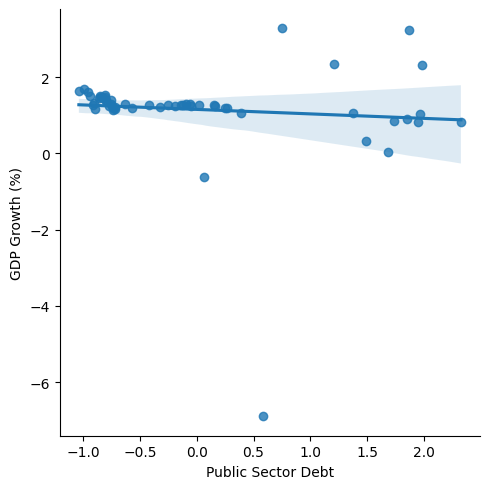

In [16]:
#PLotting
sns.lmplot(data = df,x = "Public Sector Debt", y = "GDP Growth (%)")

# Multi Variable Linear Regression
y = a1x1 + a2x2 + ..... + anxn + b </br>
x1 = Public Sector Debt </br>
x2 = Exchange Rate </br>
x3 = Inflation </br>
y = GDP Growth </br>

In [17]:
x_mlr = df[["Public Sector Debt","Exchange Rate (IDR)", "Inflation (%)"]]
y_mlr = df["GDP Growth (%)"]
mlr = LinearRegression()
mlr.fit(x_mlr,y_mlr)

LinearRegression()

In [18]:
#Coefficient for each x (a1,a2,a3)
mlr.coef_

array([ 0.17067046, -0.32170223,  0.05516775])

In [19]:
##b (bias)
mlr.intercept_

0.9142844472117041

Test to predict the GDP (y) for array no.15 </br>
y = a1x1 + a2x2 + a3x3 + b </br>
y = 0.17067046 * -0.914268 + -0.32170223 * 0.347261 + 0.05516775 * 3.643333 + 0.9142844472117041 </br>
the result (y) supposed to be around 1.27005 </br>

In [20]:
#Manual Calculation
a1 = mlr.coef_[0]
a2 = mlr.coef_[1]
a3 = mlr.coef_[2]
x1 = df["Public Sector Debt"][15]
x2 = df["Exchange Rate (IDR)"][15]
x3 = df["Inflation (%)"][15]
b = mlr.intercept_
y = a1*x1 + a2*x2 + a3*x3 + b
y

1.331367483182115

In [21]:
#Comparison with code
mlr.predict(x_mlr.iloc[15,:].to_numpy().reshape(1,-1))

C:\ProgramData\anaconda3\envs\DataMining\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.33136748])

### R-Squared
R^2 = 1 - (Sigma(y - y_hat)^2/Sigma(y-y_bar)^2) </br>
where </br>
y = actual output </br>
y_hat = predicted output </br>
y_bar = output mean

In [33]:
#Manual Calculation
y_bar = np.mean(y_mlr)
y_hat = mlr.predict(x_mlr)
SSres = np.sum((y_mlr - y_hat) ** 2)
SStot = np.sum((y_mlr - y_bar) ** 2)
SS = SSres/SStot
r2_manual = 1-SS
r2_manual

0.04731473964118904

In [22]:
#Calculating r-squared score for multi linear
r2 = r2_score(y_mlr, mlr.predict(x_mlr))
r2

0.04731473964118904

### Adjusted R-Squared
R^2adj = 1-(((1-R^2)*(n-1))/(n-p-1)) </br>
where </br>
R^2 = R-squared </br>
n = numbers of arrays </br>
p = numbers of features

In [23]:
#Manual Calculation for adjusted r-squared
n = 54
p = 3
upper1 = 1-r2
upper2 = n-1
upper = upper1*upper2
lower = n-p-1
eq = upper/lower
r2adj = 1-eq
r2adj

-0.00984637598033955

### Notes about R-Squared and Adjusted R-Squared
R-Squared : how big the affection of independent variables to the dependent variable </br>
Scale : -1 to 1 (negative means the model does not follow the trend of the data / overfitting) </br>
closer to -1 means worse model prediction </br>
0-0.25 = weak affection </br>
0.25-0.75 = moderate affection </br>
0.75-1 = strong affection